In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [11]:
image_dir = '../images'
merfish_dir = f'{image_dir}/u2os'
smfish_dir = f'{image_dir}/u2os-smfish'

model_dir = './models'

In [15]:
# 8 images (20%) chosen for test
X_test_names = sorted(glob(f'{smfish_dir}/test/*.tif'))
X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, X_test_names))]
Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
Y_test = list(map(io.imread, Y_test_names))

In [16]:
# Load from disk
smfish_nuclei_model = StarDist2D(None, name='smfish_nuclei_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.780102, nms_thresh=0.3.


In [17]:
Y_pred = [smfish_nuclei_model.predict_instances(x, n_tiles=smfish_nuclei_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(X_test)]


100%|██████████| 8/8 [03:08<00:00, 23.55s/it]


In [18]:
Y_pred_labels = [pred[0] for pred in Y_pred]
stats = [matching_dataset(Y_test, Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]


100%|██████████| 9/9 [00:23<00:00,  2.58s/it]


In [19]:
stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=7, tp=38, fn=5, precision=0.8444444444444444, recall=0.8837209302325582, accuracy=0.76, f1=0.8636363636363636, n_true=43, n_pred=45, mean_true_score=0.5099647064856825, mean_matched_score=0.5770653257601144, panoptic_quality=0.49837459952009877, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=8, tp=37, fn=6, precision=0.8222222222222222, recall=0.8604651162790697, accuracy=0.7254901960784313, f1=0.8409090909090909, n_true=43, n_pred=45, mean_true_score=0.5064955546775872, mean_matched_score=0.5886299689496284, panoptic_quality=0.4949842920712784, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=10, tp=35, fn=8, precision=0.7777777777777778, recall=0.813953488372093, accuracy=0.660377358490566, f1=0.7954545454545454, n_true=43, n_pred=45, mean_true_score=0.4962770607480739, mean_matched_score=0.6097118174904907, panoptic_quality=0.4849980366401631, by_image=False),
 DatasetMatching(criterion='iou', thres

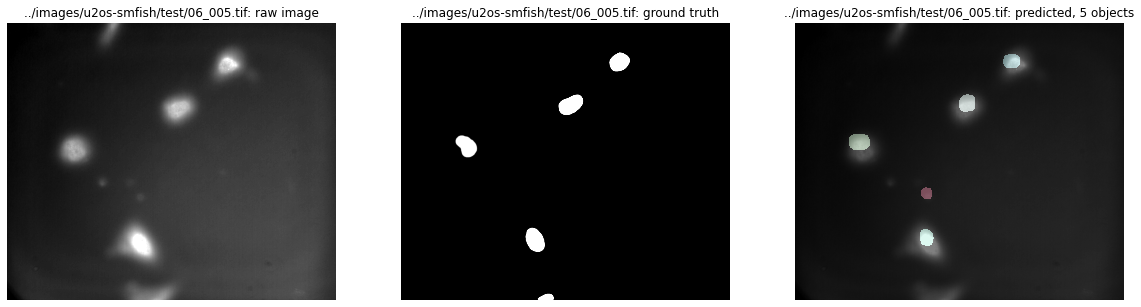

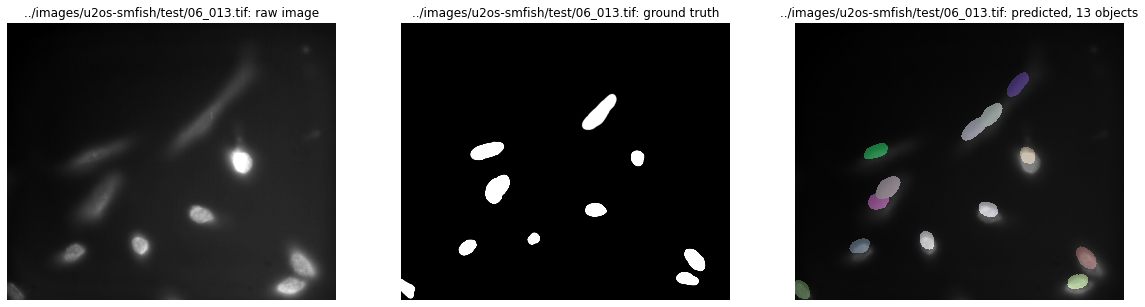

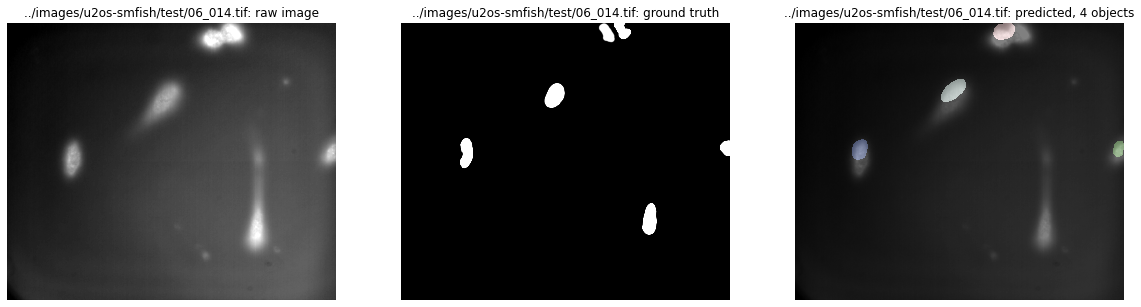

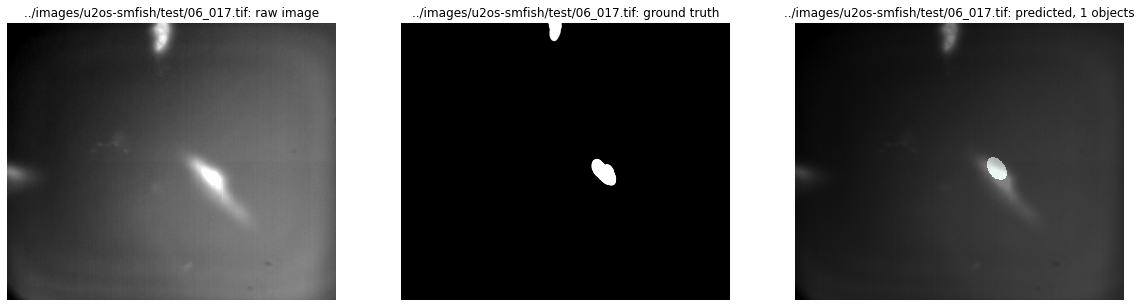

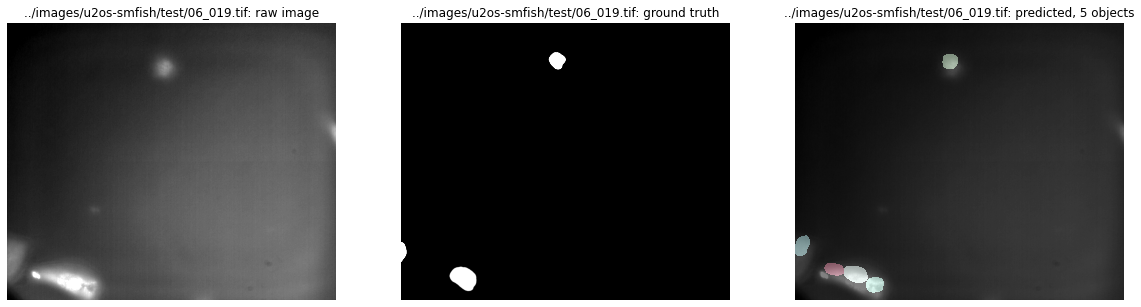

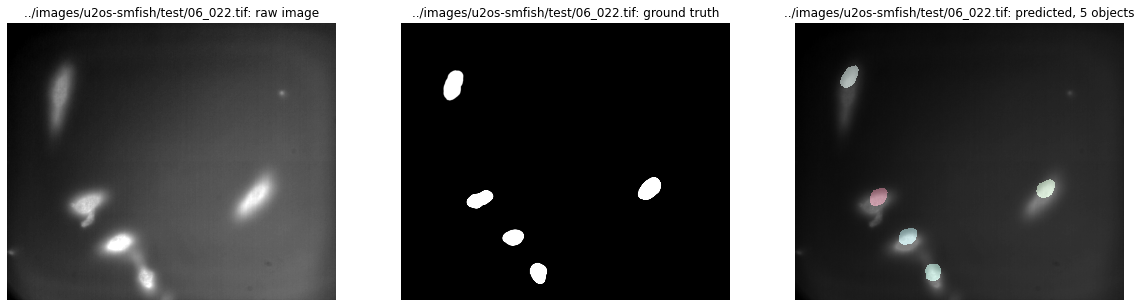

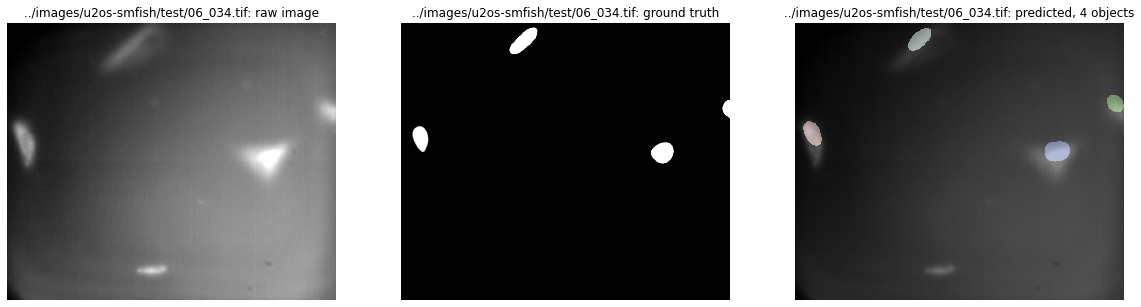

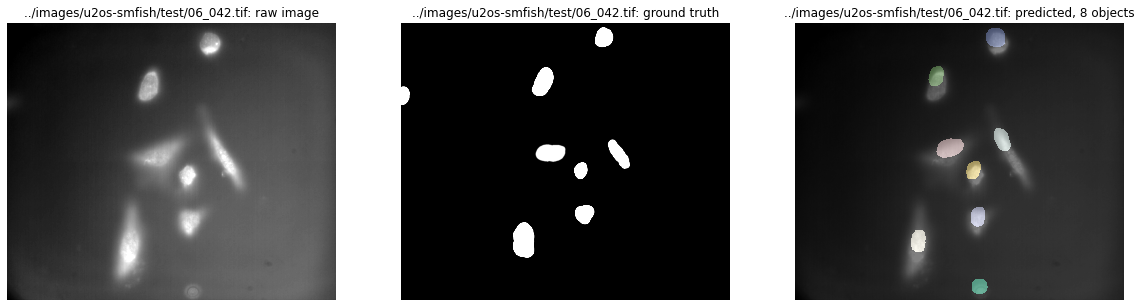

In [20]:
show_test_images(X_test, Y_test, Y_pred, X_test_names)

In [22]:
save_scores_csv(stats)